In [11]:
import numpy as np

In [12]:
from sklearn.metrics import accuracy_score
class Adaboost():
    def __init__(self, M, N, clf):
        self.M = M
        self.N = N
        self.clf = clf

        # Initialise weights
        self.w = np.array([1/N for _ in range(N)])

    def fit(self, X_train, y_train, X_test, y_test):
        train_errors = []
        test_errors = []
        train_y_pred = np.zeros(X_train.shape[0])
        test_y_pred = np.zeros(X_test.shape[0])
        
        for _ in range(self.M):
            # Fit the classifier on training data using weights w
            G_m = self.clf()
            G_m.fit(X_train, y_train, sample_weight=self.w)

            # Compute error
            y_pred = G_m.predict(X_train)
            err = np.sum(self.w * (y_pred != y_train)) / np.sum(self.w)

            # Compute alpha
            alpha_m = np.log((1 - err) / err)
            
            # Update weights
            self.w = self.w * np.exp(alpha_m * (y_pred != y_train))

            train_y_pred = train_y_pred + alpha_m * G_m.predict(X_train)
            train_error = 1 - accuracy_score(y_train, np.sign(train_y_pred))
            train_errors.append(train_error)

            test_y_pred = test_y_pred + alpha_m * G_m.predict(X_test)
            test_error = 1 - accuracy_score(y_test, np.sign(test_y_pred))
            test_errors.append(test_error)

        return train_errors, test_errors

In [13]:
from scipy.stats import chi2

n_features = 10
n_train = 2000
n_test = 10000
chi2_threshold = chi2.ppf(0.5, df=n_features)

In [14]:
def generate_data(n_samples):
    X = np.random.randn(n_samples, n_features)
    y = np.where(np.sum(X**2, axis=1) > chi2_threshold, 1, -1)
    return X, y

In [15]:
X_train, y_train = generate_data(n_train)
X_test, y_test = generate_data(n_test)

In [16]:
from sklearn.tree import DecisionTreeClassifier

stump = DecisionTreeClassifier(max_depth=1, random_state=42)
stump.fit(X_train, y_train)
stump_error = 1 - stump.score(X_test, y_test)

In [17]:
tree_244 = DecisionTreeClassifier(max_depth=244, random_state=42)
tree_244.fit(X_train, y_train)
tree_244_error = 1 - tree_244.score(X_test, y_test)

In [18]:
adaboost = Adaboost(400, n_train, lambda: DecisionTreeClassifier(max_depth=1, random_state=42))
train_errors, test_errors = adaboost.fit(X_train, y_train, X_test, y_test)

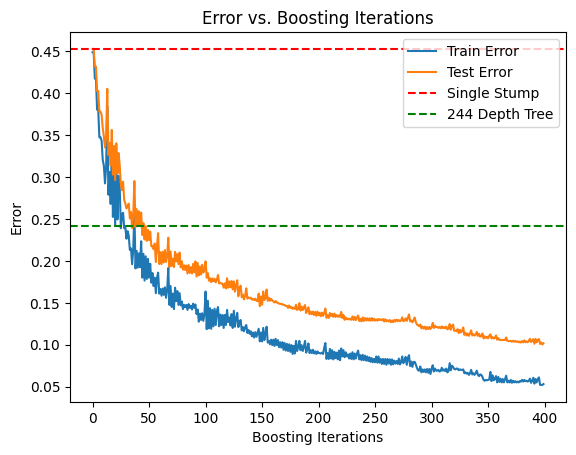

In [19]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(train_errors, label='Train Error')
plt.plot(test_errors, label='Test Error')
plt.axhline(y=stump_error, color='r', linestyle='--', label='Single Stump')
plt.axhline(y=tree_244_error, color='g', linestyle='--', label='244 Depth Tree')
plt.xlabel('Boosting Iterations')
plt.ylabel('Error')
plt.title('Error vs. Boosting Iterations')
plt.legend()
plt.show()

In [20]:
adaboost = Adaboost(100000, n_train, lambda: DecisionTreeClassifier(max_depth=1, random_state=42))
train_errors, test_errors = adaboost.fit(X_train, y_train, X_test, y_test)

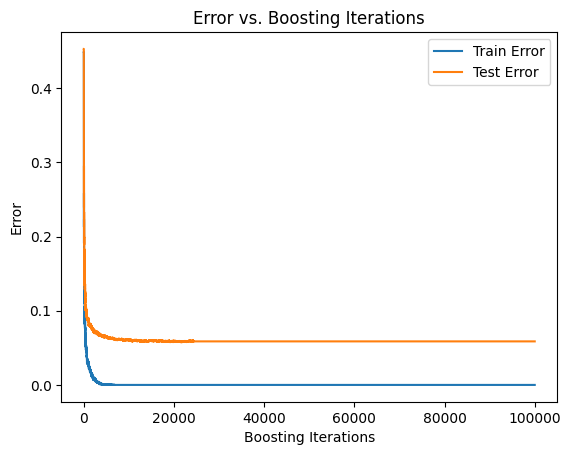

In [21]:
plt.figure()
plt.plot(train_errors, label='Train Error')
plt.plot(test_errors, label='Test Error')
plt.xlabel('Boosting Iterations')
plt.ylabel('Error')
plt.title('Error vs. Boosting Iterations')
plt.legend()
plt.show()

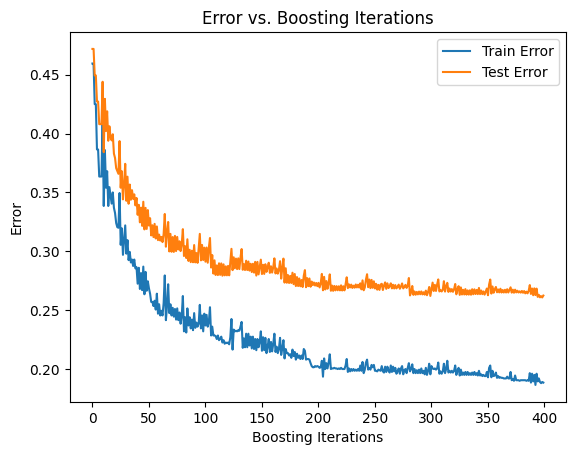

In [22]:
n_features = 10
n_train = 2000
n_test = 10000

def generate_class1_data(n_samples):
    X = np.random.randn(n_samples, n_features)
    y = np.ones(n_samples)
    return X, y

def generate_class2_data(n_samples):
    X = []
    while len(X) < n_samples:
        sample = np.random.randn(1, n_features)
        if np.sum(sample ** 2) > 12:
            X.append(sample)
    X = np.array(X).squeeze()
    y = -1 * np.ones(n_samples)
    return X, y

X2_train_1, y2_train_1 = generate_class1_data(n_train // 2)
X2_train_2, y2_train_2 = generate_class2_data(n_train // 2)
X2_train = np.vstack((X2_train_1, X2_train_2))
y2_train = np.hstack((y2_train_1, y2_train_2))

X2_test_1, y2_test_1 = generate_class1_data(n_test // 2)
X2_test_2, y2_test_2 = generate_class2_data(n_test // 2)
X2_test = np.vstack((X2_test_1, X2_test_2))
y2_test = np.hstack((y2_test_1, y2_test_2))

adaboost = Adaboost(400, n_train, lambda: DecisionTreeClassifier(max_depth=1, random_state=42))
train_errors, test_errors = adaboost.fit(X2_train, y2_train, X2_test, y2_test)

plt.figure()
plt.plot(train_errors, label='Train Error')
plt.plot(test_errors, label='Test Error')
plt.xlabel('Boosting Iterations')
plt.ylabel('Error')
plt.title('Error vs. Boosting Iterations')
plt.legend()
plt.show()

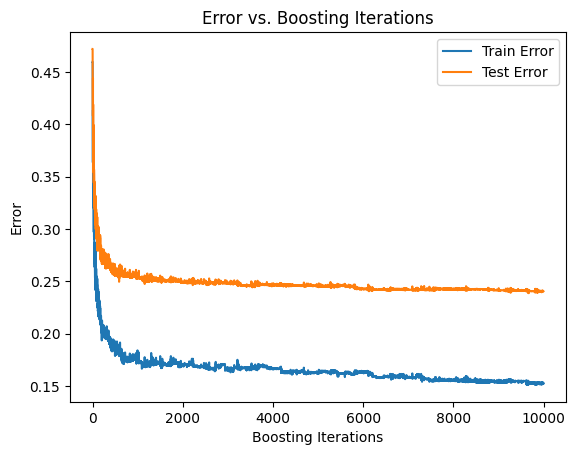

In [23]:
adaboost = Adaboost(10000, n_train, lambda: DecisionTreeClassifier(max_depth=1, random_state=42))
train_errors, test_errors = adaboost.fit(X2_train, y2_train, X2_test, y2_test)

plt.figure()
plt.plot(train_errors, label='Train Error')
plt.plot(test_errors, label='Test Error')
plt.xlabel('Boosting Iterations')
plt.ylabel('Error')
plt.title('Error vs. Boosting Iterations')
plt.legend()
plt.show()